In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls "/gdrive/My Drive/train001"

imagedata_train001_0_8408.npy		   my_model_train001_0_8408_512.h5
imagedata_train004_0_8415.npy		   train001.csv
imagedata_train005_0_1427.npy		   train004.csv
my_model_train001005_0_8394_0_1427_512.h5  train005.csv


In [3]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train004_0_8415.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train004.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8415,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#load partially trained model
new_model = load_model('/gdrive/My Drive/train001/my_model_train001_0_8408_512.h5')

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 20, verbose = 2, validation_split = 0.05)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/DiabeticRetinopathy_Detection/my_model_train001004_0_8394_0_8415_512.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation  

print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Using TensorFlow backend.


             0  1
0   38791_left  0
1  38791_right  0
2   38792_left  0
3  38792_right  0
4   38795_left  2
(8415,)
0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
2019-02-24 14:25:05.127502
Train on 7994 samples, validate on 421 samples
Epoch 1/20
 - 31s - loss: 4.2701 - acc: 0.7344 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 2/20
 - 31s - loss: 4.2628 - acc: 0.7349 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 3/20
 - 31s - loss: 4.2624 - acc: 0.7352 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 4/20
 - 31s - loss: 4.2664 - acc: 0.7347 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 5/20
 - 31s - loss: 4.2651 - acc: 0.7344 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 6/20
 - 31s - loss: 4.2649 - acc: 0.7349 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 7/20
 - 31s - loss: 4.2627 - acc: 0.7348 - val_loss: 4.5177 - v

OSError: ignored

             0  1
0   38791_left  0
1  38791_right  0
2   38792_left  0
3  38792_right  0
4   38795_left  2
(8415,)
0
2019-02-24 14:36:49.938332
Train on 7994 samples, validate on 421 samples
Epoch 1/20
 - 31s - loss: 4.2614 - acc: 0.7349 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 2/20
 - 31s - loss: 4.2629 - acc: 0.7347 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 3/20
 - 31s - loss: 4.2656 - acc: 0.7341 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 4/20
 - 31s - loss: 4.2383 - acc: 0.7336 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 5/20
 - 31s - loss: 4.2774 - acc: 0.7308 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 6/20
 - 32s - loss: 4.2609 - acc: 0.7310 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 7/20
 - 31s - loss: 4.2657 - acc: 0.7341 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 8/20
 - 31s - loss: 4.2595 - acc: 0.7333 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 9/20
 - 31s - loss: 4.2618 - acc: 0.7337 - val_loss: 4.5177 - val_acc: 0.7197
Epoch 10/20
 - 31s - loss: 4.2577 - acc: 0.7336 - va

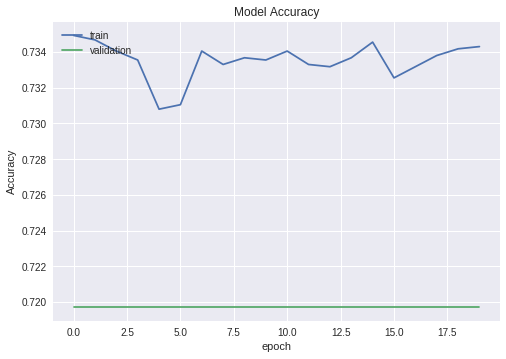

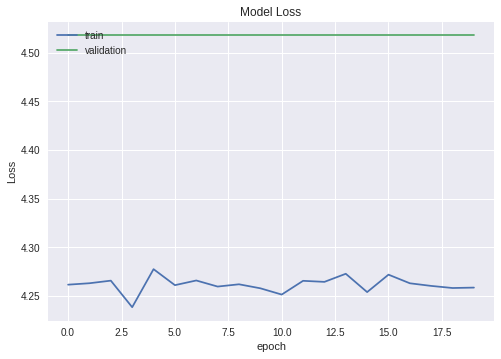

In [4]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train004_0_8415.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train004.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8415,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#load partially trained model
new_model = load_model('/gdrive/My Drive/train001/my_model_train001_0_8408_512.h5')

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 20, verbose = 2, validation_split = 0.05)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/train001/my_model_train001004_0_8394_0_8415_512.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation  

print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [5]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train004_0_8415.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train004.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8415,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#load partially trained model
new_model = load_model('/gdrive/My Drive/train001/my_model_train001_0_8408_512.h5')

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 20, verbose = 2, validation_split = 0.2)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/train001/my_model_train001004_0_8394_0_8415_512.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation  

print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

             0  1
0   38791_left  0
1  38791_right  0
2   38792_left  0
3  38792_right  0
4   38795_left  2
(8415,)
0
2019-02-24 14:47:48.123491
Train on 6732 samples, validate on 1683 samples
Epoch 1/20
 - 27s - loss: 4.2251 - acc: 0.7365 - val_loss: 4.4437 - val_acc: 0.7243
Epoch 2/20
 - 27s - loss: 4.2440 - acc: 0.7351 - val_loss: 4.4437 - val_acc: 0.7243
Epoch 3/20
 - 27s - loss: 4.2368 - acc: 0.7363 - val_loss: 4.4437 - val_acc: 0.7243
Epoch 4/20
 - 27s - loss: 4.2408 - acc: 0.7359 - val_loss: 4.4437 - val_acc: 0.7243
Epoch 5/20


AttributeError: ignored

             0  1
0   38791_left  0
1  38791_right  0
2   38792_left  0
3  38792_right  0
4   38795_left  2
(8415,)
0
2019-02-24 14:50:23.539617
Train on 5890 samples, validate on 2525 samples
Epoch 1/10
 - 25s - loss: 4.2358 - acc: 0.7360 - val_loss: 4.3662 - val_acc: 0.7291
Epoch 2/10
 - 25s - loss: 4.2334 - acc: 0.7365 - val_loss: 4.3662 - val_acc: 0.7291
Epoch 3/10
 - 25s - loss: 4.2385 - acc: 0.7353 - val_loss: 4.3662 - val_acc: 0.7291
Epoch 4/10
 - 25s - loss: 4.2336 - acc: 0.7358 - val_loss: 4.3662 - val_acc: 0.7291
Epoch 5/10
 - 25s - loss: 4.2369 - acc: 0.7367 - val_loss: 4.3662 - val_acc: 0.7291
Epoch 6/10
 - 25s - loss: 4.2490 - acc: 0.7357 - val_loss: 4.3662 - val_acc: 0.7291
Epoch 7/10
 - 25s - loss: 4.2461 - acc: 0.7362 - val_loss: 4.3662 - val_acc: 0.7291
Epoch 8/10
 - 25s - loss: 4.2281 - acc: 0.7370 - val_loss: 4.3662 - val_acc: 0.7291
Epoch 9/10
 - 25s - loss: 4.2315 - acc: 0.7362 - val_loss: 4.3662 - val_acc: 0.7291
Epoch 10/10
 - 25s - loss: 4.2362 - acc: 0.7360 - v

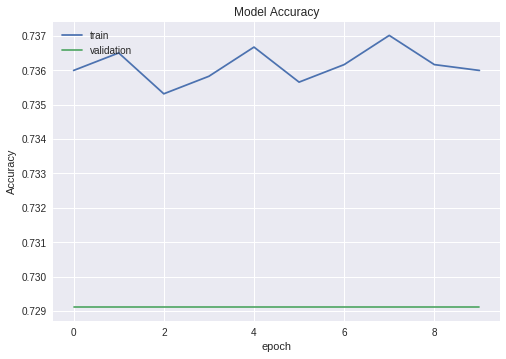

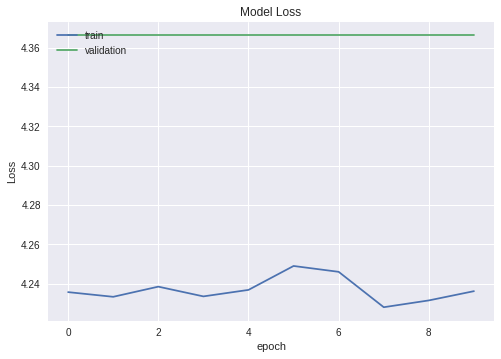

In [6]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train004_0_8415.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train004.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8415,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#load partially trained model
new_model = load_model('/gdrive/My Drive/train001/my_model_train001_0_8408_512.h5')

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 10, verbose = 2, validation_split = 0.3)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/train001/my_model_train001004_0_8394_0_8415_512.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation  

print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()